In [ ]:
!pip install -U datasets huggingface_hub fsspec pandas scikit-learn matplotlib seaborn numpy

# ✅ STEP 2: Import Libraries
from datasets import load_dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

  Using cached fsspec-2025.7.0-py3-none-any.whl.metadata (12 kB)


In [ ]:
# ✅ STEP 3: Load CIC-IDS2017 (Binary) Dataset
from datasets import load_dataset
dataset = load_dataset("sonnh-tech1/cic-ids-2017", "binary")
df = dataset["train"].to_pandas()
print(df)

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/92.8M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/108M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2522362 [00:00<?, ? examples/s]

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:
# ✅ STEP 4: Preprocess Data
#df.dropna(inplace=True)  # Drop missing rows
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  # Benign=0, Threat=1
X = df.drop('Label', axis=1)
y = df['Label']
print(X,y)
X_numeric = X.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
print(X_scaled)
print(y)

         DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0                  54865             3                2                     0   
1                  55054           109                1                     1   
2                  55055            52                1                     1   
3                  46236            34                1                     1   
4                  54863             3                2                     0   
...                  ...           ...              ...                   ...   
2522357               53         32215                4                     2   
2522358               53           324                2                     2   
2522359            58030            82                2                     1   
2522360               53       1048635                6                     2   
2522361               53         94939                4                     2   

         TotalLengthofFwdPa

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# ✅ 1. Stratified Train/Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
# ✅ 2. Simpler Model to avoid 99% accuracy
model = RandomForestClassifier(
    n_estimators=80,          # Fewer trees → less overfitting
    max_depth=10,             # Restrict tree depth
    min_samples_split=4,      # Avoid tiny splits
    min_samples_leaf=5,       # Larger leaves = less memorization
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [ ]:
 #✅ 3. Train the model
model.fit(X_train, y_train)

,n_estimators,80
,criterion,'gini'
,max_depth,10
,min_samples_split,4
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# ✅ 4. Predict and evaluate
y_pred = model.predict(X_test)
# ✅ 5. Accuracy and Overfitting Check
train_acc = model.score(X_train, y_train)
test_acc = model.score(X_test, y_test)

print(f"✅ Train Accuracy: {train_acc:.4f}")
print(f"✅ Test Accuracy:  {test_acc:.4f}")
print(f"✅ Weighted F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

# ✅ 6. Detailed Evaluation
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("\n📊 Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

✅ Train Accuracy: 0.9621
✅ Test Accuracy:  0.9623
✅ Weighted F1 Score: 0.9781

📄 Classification Report:

              precision    recall  f1-score   support

           0     0.9990    0.9565    0.9773    419297
           1     0.0305    1.0000    0.0591       391
           2     0.9974    0.9988    0.9981     25603
           3     0.8265    0.9864    0.8994      2057
           4     0.9943    0.9882    0.9913     34570
           5     0.8831    0.9895    0.9333      1046
           6     0.9673    0.9889    0.9780      1077
           7     0.9992    0.9992    0.9992      1187
           8     0.6667    1.0000    0.8000         2
           9     1.0000    0.7143    0.8333         7
          10     0.9898    0.9982    0.9940     18164
          11     1.0000    0.9286    0.9630       644
          12     0.1316    0.4422    0.2028       294
          13     0.0014    1.0000    0.0029         4
          14     0.0689    0.8308    0.1273       130

    accuracy                 

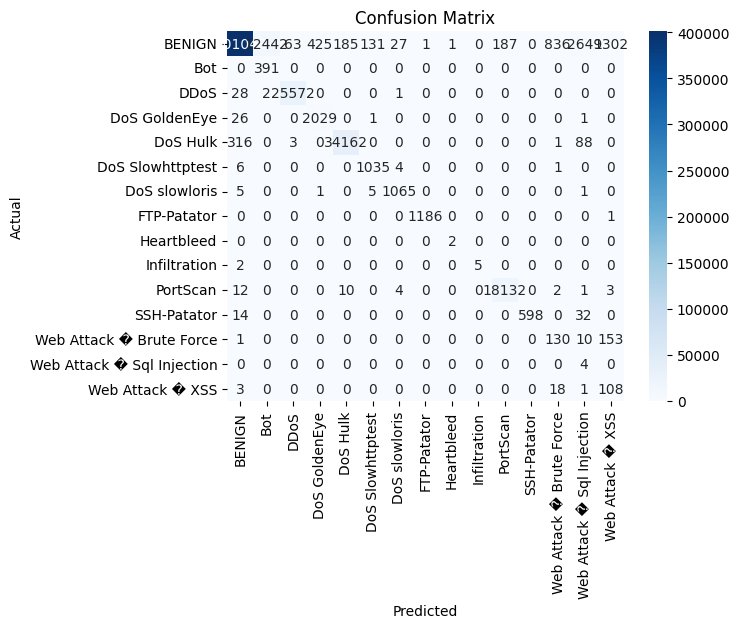

In [ ]:
# ✅ STEP 8: Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

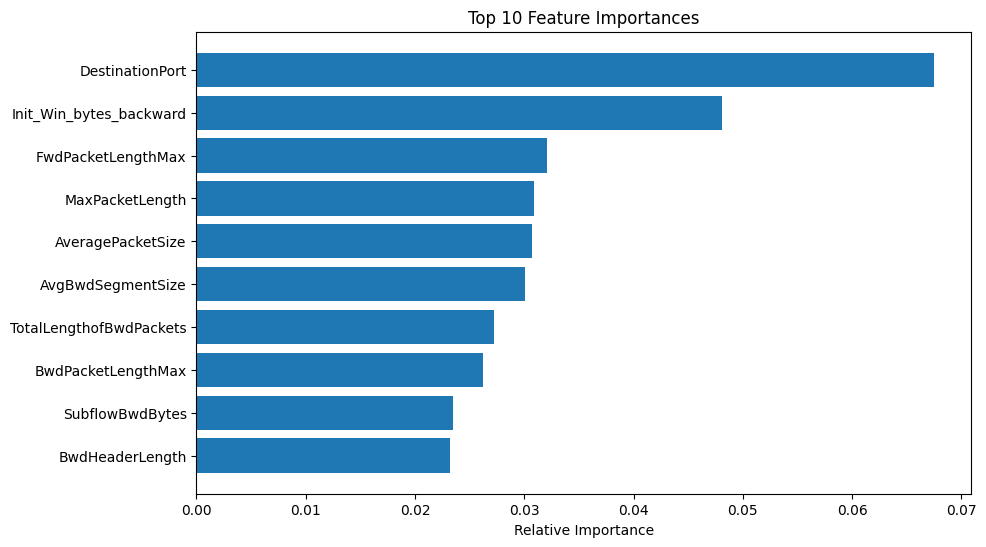

In [ ]:
# ✅ STEP 9: Feature Importancess
import numpy as np
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10
features = X.columns if isinstance(X, pd.DataFrame) else range(len(indices))

plt.figure(figsize=(10,6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()